#DOWNLOAD THE DATASET from GitHub automatiicly BY RUNNING THIS CELL

In [20]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_duplicates_removed.csv -O 3_duplicates_removed.csv


--2025-04-12 14:28:29--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_duplicates_removed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8439 (8.2K) [text/plain]
Saving to: ‘3_duplicates_removed.csv’

3_duplicates_remove 100%[===================>]   8.24K  --.-KB/s    in 0s      

2025-04-12 14:28:29 (46.9 MB/s) - ‘3_duplicates_removed.csv’ saved [8439/8439]



#K-Means CLUSTERING BASED ON THE TARTGET VARIABLES FOR PRODUCTION QUANTITY & QUALITY

In [21]:
# # prompt: #K-Means CLUSTERING BASED ON THE TARTGET VARIABLES FOR PRODUCTION QUANTITY & QUALITY

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Assuming your data is in a CSV file named 'data.csv'
# # Replace 'data.csv' with your actual file name
# # data = pd.read_csv('data.csv')

# # Select the relevant columns for clustering (Production Quantity and Quality)
# X = data[['Production_Quantity', 'Quality']]  # Replace with your actual column names

# # Determine the optimal number of clusters using the Elbow method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()


# # Based on the Elbow method plot, choose the optimal number of clusters (e.g., k=3)
# k = 3  # Replace with your chosen number of clusters
# kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
# y_kmeans = kmeans.fit_predict(X)

# # Add the cluster labels to your data
# data['Cluster'] = y_kmeans

# # Visualize the clusters
# plt.scatter(X[y_kmeans == 0]['Production_Quantity'], X[y_kmeans == 0]['Quality'], s=100, c='red', label='Cluster 1')
# plt.scatter(X[y_kmeans == 1]['Production_Quantity'], X[y_kmeans == 1]['Quality'], s=100, c='blue', label='Cluster 2')
# plt.scatter(X[y_kmeans == 2]['Production_Quantity'], X[y_kmeans == 2]['Quality'], s=100, c='green', label='Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
# plt.title('Clusters of Production Quantity and Quality')
# plt.xlabel('Production Quantity')
# plt.ylabel('Quality')
# plt.legend()
# plt.show()


# # Analyze the clusters
# print(data.groupby('Cluster').mean())  # See the average values for each cluster

# # Further analysis can include box plots, histograms, etc., to better understand the characteristics of each cluster
# # Example box plot for production quantity within clusters
# data.boxplot(column='Production_Quantity', by='Cluster')
# plt.title("Production Quantity by Cluster")
# plt.show()


📊 Cluster Centers (Original Scale):
   Sugars (Su)  Weight of 300 Seeds (W3S)  Seed Yield per Unit Area (SYUA)  \
0     0.368757                  39.016216                      5499.181081   
1     0.534239                  33.438028                      3809.564789   

   Number of Seeds per Pod (NSP)  Protein Percentage (PPE)  \
0                       2.227838                 36.481081   
1                       1.911831                 35.814085   

   Protein Content (PCO)  
0               0.475135  
1               0.524507  


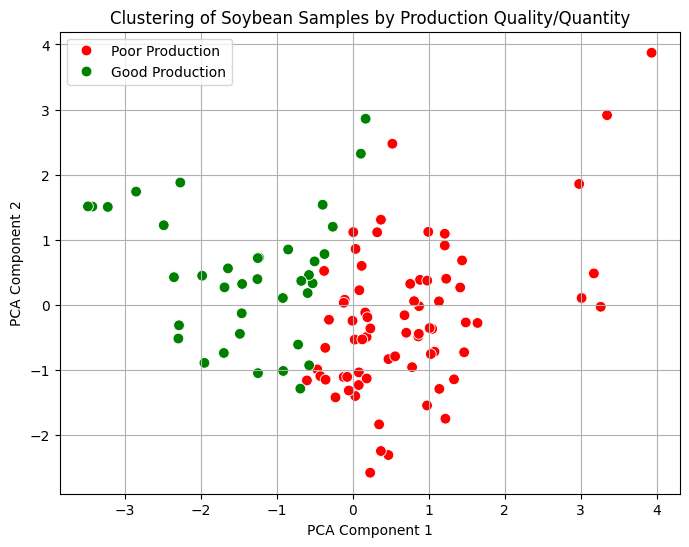

In [22]:
# ====================================
# 1. Load and Prepare the Dataset
# ====================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("3_duplicates_removed.csv")

# Drop duplicates
data = data.drop_duplicates()

# Select target-quality features
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)",
            "Protein Percentage (PPE)", "Protein Content (PCO)"]

X = data[features].dropna()  # drop missing rows

# ====================================
# 2. Normalize the Features
# ====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====================================
# 3. Run KMeans Clustering
# ====================================
k = 2  # you can try 3 if you want a "medium" group too
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
X_clustered = X.copy()
X_clustered["Cluster"] = cluster_labels

# ====================================
# 4. Analyze Cluster Centroids
# ====================================
# Inverse-transform centroids to original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original, columns=features)

print("📊 Cluster Centers (Original Scale):")
print(centroids_df)

# ====================================
# 5. Label Clusters Based on Centroid Stats
# ====================================
# Sum of average values per cluster to rank them
centroids_df["Total"] = centroids_df.sum(axis=1)
sorted_clusters = centroids_df["Total"].sort_values(ascending=False)

# Map clusters to labels
cluster_map = {}
for i, cluster_id in enumerate(sorted_clusters.index):
    cluster_map[cluster_id] = "Good Production" if i == 0 else "Poor Production"

# Apply labels
X_clustered["Cluster Label"] = X_clustered["Cluster"].map(cluster_map)

# ====================================
# 6. Visualize Clusters in 2D using PCA
# ====================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=X_clustered["Cluster Label"],
                palette={"Good Production": "green", "Poor Production": "red"},
                s=60)
plt.title("Clustering of Soybean Samples by Production Quality/Quantity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend()
plt.show()


In [23]:
X_clustered

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster,Cluster Label
0,0.433,33.6,5567.4,1.86,33.2,0.82,1,Poor Production
1,0.334,34.4,2245.5,1.87,38.5,0.13,1,Poor Production
2,0.490,35.2,4326.7,2.04,33.6,0.15,1,Poor Production
3,0.163,52.3,6214.5,2.20,33.5,0.14,0,Good Production
4,0.795,31.2,3897.8,1.88,39.6,0.60,1,Poor Production
...,...,...,...,...,...,...,...,...
103,0.663,31.2,4472.7,2.60,39.7,0.32,0,Good Production
104,0.165,34.5,5643.7,2.60,33.6,0.36,0,Good Production
105,1.115,37.2,3067.1,1.80,37.2,1.15,1,Poor Production
106,0.295,35.3,3112.2,2.10,32.3,0.17,1,Poor Production


In [24]:
X_clustered.to_csv("2_clusters_only_on_output.csv", index=False)

In [25]:
data

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,5643.7,2.60,0.36
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,3067.1,1.80,1.15
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,3112.2,2.10,0.17


In [26]:
C=[]
S=[]
G=[]
for i in range(len(data["Parameters"])):
    C.append(int(data["Parameters"][i].split("S")[0][-1]))
    S.append(int(data["Parameters"][i].split("S")[1][0]))
    G.append(int(data["Parameters"][i].split("G")[1][0]))
data["C"]=C
data["S"]=S
data["G"]=G

# data_features=data.drop("Parameters",axis=1)
# data_features = data_features.drop("Random",axis=1,inplace=True)

data_features =  data.iloc[:,3:]
data_features

,Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO),C,S,G
0,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82,1,1,5
1,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13,2,3,4
2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15,2,1,6
3,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14,1,1,1
4,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32,1,2,3
104,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,5643.7,2.60,0.36,1,3,2
105,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,3067.1,1.80,1.15,2,1,5
106,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,3112.2,2.10,0.17,2,2,4


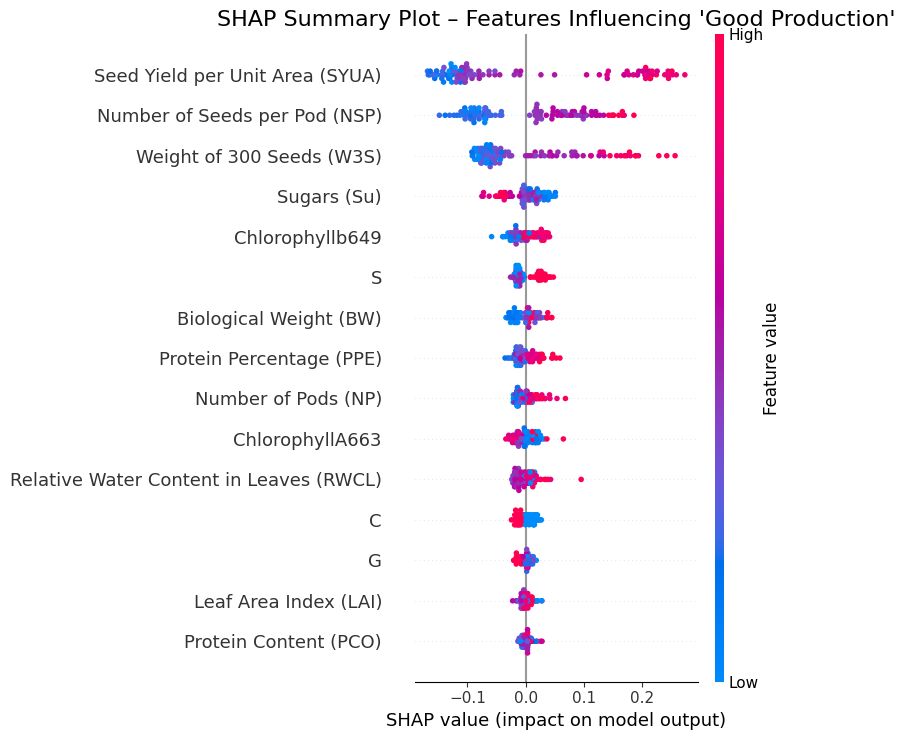

In [27]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Select the same features used for clustering
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)",
            "Protein Percentage (PPE)", "Protein Content (PCO)"]

# 2. Prepare data
# X = X_clustered[features].copy()
# X = X_clustered.drop("Cluster Label", axis=1).copy()
X = data_features.copy()
y = X_clustered["Cluster Label"]

# 3. Encode class labels (e.g., Good=0, Poor=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Train a classifier to predict cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Create SHAP Explainer using model_output="probability"
explainer = shap.Explainer(model, X, model_output="probability")

# 6. Compute SHAP values
shap_values = explainer(X, check_additivity=False)

# 7. Extract SHAP values for class 0 (Good Production)
shap_values_class0 = shap_values.values[:, :, 0]  # Extract class 1 values from multi-class SHAP output

# 8. Plot SHAP summary for class 0
plt.figure()
shap.summary_plot(shap_values_class0, X, plot_type="dot", show=False)
plt.title("SHAP Summary Plot – Features Influencing 'Good Production'", fontsize=16)
plt.tight_layout()
plt.show()

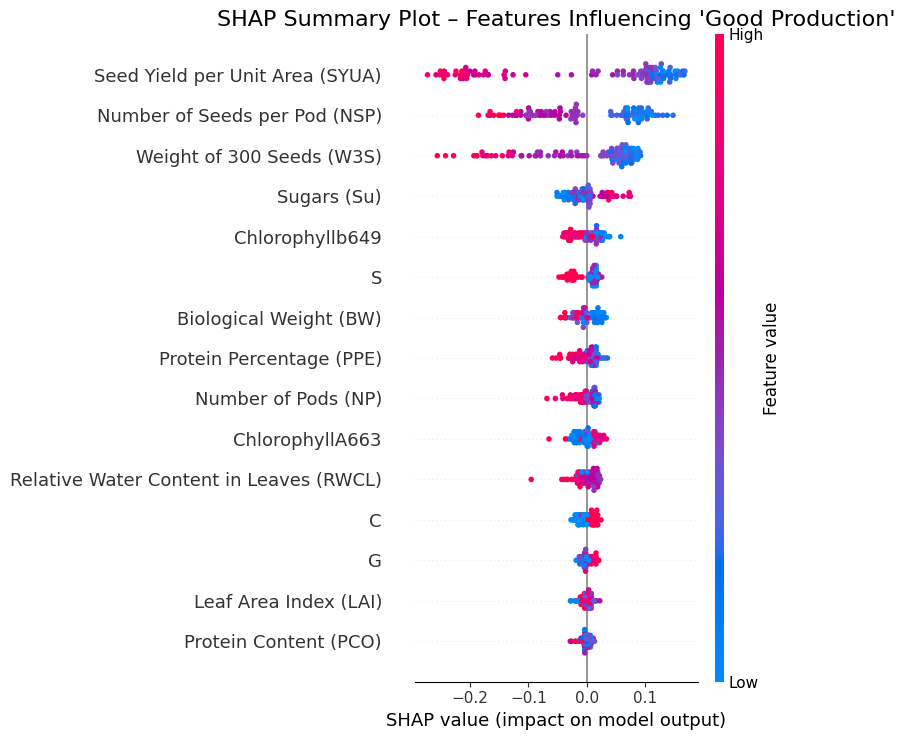

In [28]:
# 7. Extract SHAP values for class 1 (Bad Production)
shap_values_class1 = shap_values.values[:, :, 1]  # Extract class 1 values from multi-class SHAP output

# 8. Plot SHAP summary for class 1
plt.figure()
shap.summary_plot(shap_values_class1, X, plot_type="dot", show=False)
plt.title("SHAP Summary Plot – Features Influencing 'Good Production'", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
X_clustered

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster,Cluster Label
0,0.433,33.6,5567.4,1.86,33.2,0.82,1,Poor Production
1,0.334,34.4,2245.5,1.87,38.5,0.13,1,Poor Production
2,0.490,35.2,4326.7,2.04,33.6,0.15,1,Poor Production
3,0.163,52.3,6214.5,2.20,33.5,0.14,0,Good Production
4,0.795,31.2,3897.8,1.88,39.6,0.60,1,Poor Production
...,...,...,...,...,...,...,...,...
103,0.663,31.2,4472.7,2.60,39.7,0.32,0,Good Production
104,0.165,34.5,5643.7,2.60,33.6,0.36,0,Good Production
105,1.115,37.2,3067.1,1.80,37.2,1.15,1,Poor Production
106,0.295,35.3,3112.2,2.10,32.3,0.17,1,Poor Production


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("3_modified.csv").drop_duplicates()

# Extract C, S, G from Parameters column (optional)
C, S, G = [], [], []
for param in data["Parameters"]:
    C.append(int(param.split("S")[0][-1]))
    S.append(int(param.split("S")[1][0]))
    G.append(int(param.split("G")[1][0]))
data["C"], data["S"], data["G"] = C, S, G

# Target features
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)",
            "Protein Percentage (PPE)", "Protein Content (PCO)"]

# Clean data
X_features = data[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# ========== CLUSTERING ==========
n_clusters = 20  # Try any number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
data_clustered = X_features.copy()
data_clustered["Cluster"] = cluster_labels

# ========== CLASSIFICATION MODEL FOR SHAP ==========
# Train a classifier to learn to predict cluster
X = X_features.copy()
y = cluster_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ========== SHAP EXPLAINER ==========
explainer = shap.Explainer(clf, X, model_output="probability")
shap_values = explainer(X, check_additivity=False)

# ========== SHAP METRIC PER CLUSTER ==========
cluster_avg_shap = {}  # cluster_id -> average SHAP value over target features

for cluster_id in range(n_clusters):
    # Get rows for this cluster
    cluster_indices = np.where(y == cluster_id)[0]

    # Extract SHAP values for this cluster (shape: [n_samples_cluster, n_features, n_classes])
    shap_cluster = shap_values.values[cluster_indices, :, cluster_id]

    # Average SHAP for this cluster (per feature)
    cluster_shap_mean_per_feature = np.abs(shap_cluster).mean(axis=0)

    # Average SHAP over all features (a scalar per cluster)
    cluster_avg_shap[cluster_id] = cluster_shap_mean_per_feature.mean()

# Final overall score: mean of all cluster-level SHAP averages
overall_avg_shap_score = np.mean(list(cluster_avg_shap.values()))

# ========== OUTPUT ==========
print("🔍 Average SHAP value per cluster:")
for cid, score in cluster_avg_shap.items():
    print(f"Cluster {cid}: {score:.4f}")
print(f"\n📊 Final Overall SHAP Score across {n_clusters} clusters: {overall_avg_shap_score:.4f}")


 96%|=================== | 2070/2160 [00:15<00:00]       

🔍 Average SHAP value per cluster:
Cluster 0: 0.1180
Cluster 1: 0.1214
Cluster 2: 0.1065
Cluster 3: 0.1040
Cluster 4: 0.1026
Cluster 5: 0.0972
Cluster 6: 0.1102
Cluster 7: 0.1152
Cluster 8: 0.1160
Cluster 9: 0.1170
Cluster 10: 0.0699
Cluster 11: 0.1190
Cluster 12: 0.0957
Cluster 13: 0.1036
Cluster 14: 0.1044
Cluster 15: 0.0981
Cluster 16: 0.1019
Cluster 17: 0.0933
Cluster 18: 0.0711
Cluster 19: 0.1127

📊 Final Overall SHAP Score across 20 clusters: 0.1039


In [31]:
# for cluster_id in range(n_clusters):
#     indices = np.where(y == cluster_id)[0]
#     shap_vals_cluster = shap_values.values[indices, :, cluster_id]

#     print(f"\nCluster {cluster_id} SHAP Summary:")
#     shap.summary_plot(shap_vals_cluster, X.iloc[indices], plot_type="dot")


🔄 Processing k = 2
🔄 Processing k = 3
🔄 Processing k = 4
🔄 Processing k = 5
🔄 Processing k = 6
🔄 Processing k = 7
🔄 Processing k = 8
🔄 Processing k = 9
🔄 Processing k = 10


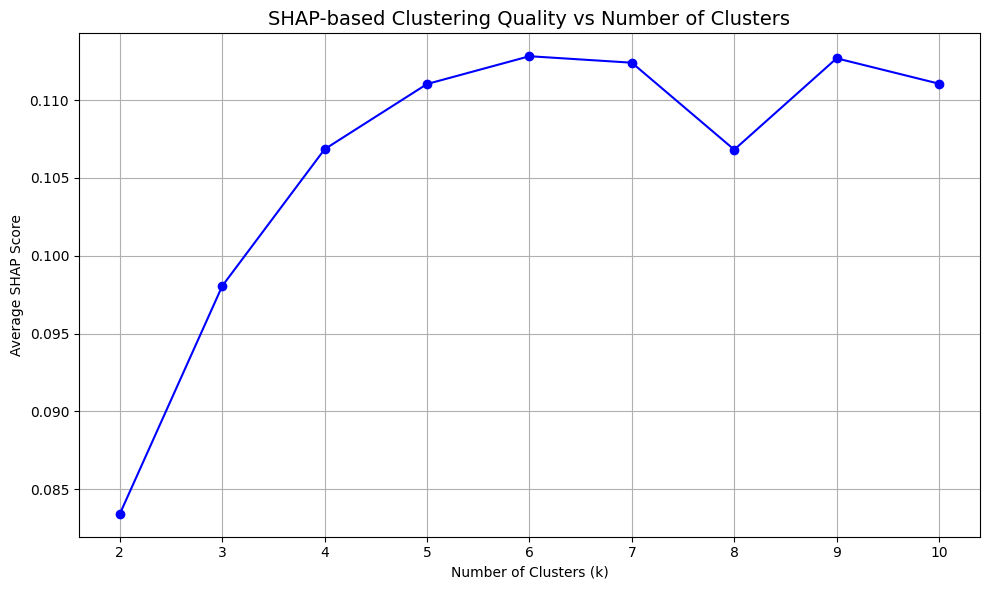

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# =========================================
# 1. Load and preprocess dataset
# =========================================
data = pd.read_csv("3_modified.csv").drop_duplicates()

# Extract C, S, G from Parameters (if present)
C, S, G = [], [], []
for param in data["Parameters"]:
    C.append(int(param.split("S")[0][-1]))
    S.append(int(param.split("S")[1][0]))
    G.append(int(param.split("G")[1][0]))
data["C"], data["S"], data["G"] = C, S, G

# Define features
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)",
            "Protein Percentage (PPE)", "Protein Content (PCO)"]

X_features = data[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# =========================================
# 2. Loop through multiple cluster sizes
# =========================================
shap_scores = []
k_range = range(2, 11)  # Try k from 2 to 10

for n_clusters in k_range:
    print(f"🔄 Processing k = {n_clusters}")

    # --- KMeans Clustering ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # --- Train classifier to predict clusters ---
    X = X_features.copy()
    y = cluster_labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # --- SHAP analysis ---
    explainer = shap.Explainer(clf, X, model_output="probability")
    shap_values = explainer(X, check_additivity=False)

    cluster_avg_shap = {}
    for cluster_id in range(n_clusters):
        indices = np.where(y == cluster_id)[0]
        shap_cluster = shap_values.values[indices, :, cluster_id]
        cluster_shap_mean = np.abs(shap_cluster).mean(axis=0)  # mean over samples
        cluster_avg_shap[cluster_id] = cluster_shap_mean.mean()  # mean over features

    # Compute overall score
    overall_avg_shap_score = np.mean(list(cluster_avg_shap.values()))
    shap_scores.append(overall_avg_shap_score)

# =========================================
# 3. Plot SHAP score vs Number of Clusters
# =========================================
plt.figure(figsize=(10, 6))
plt.plot(k_range, shap_scores, marker='o', linestyle='-', color='blue')
plt.title("SHAP-based Clustering Quality vs Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average SHAP Score")
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

#WHY NOT PCA-2 ?

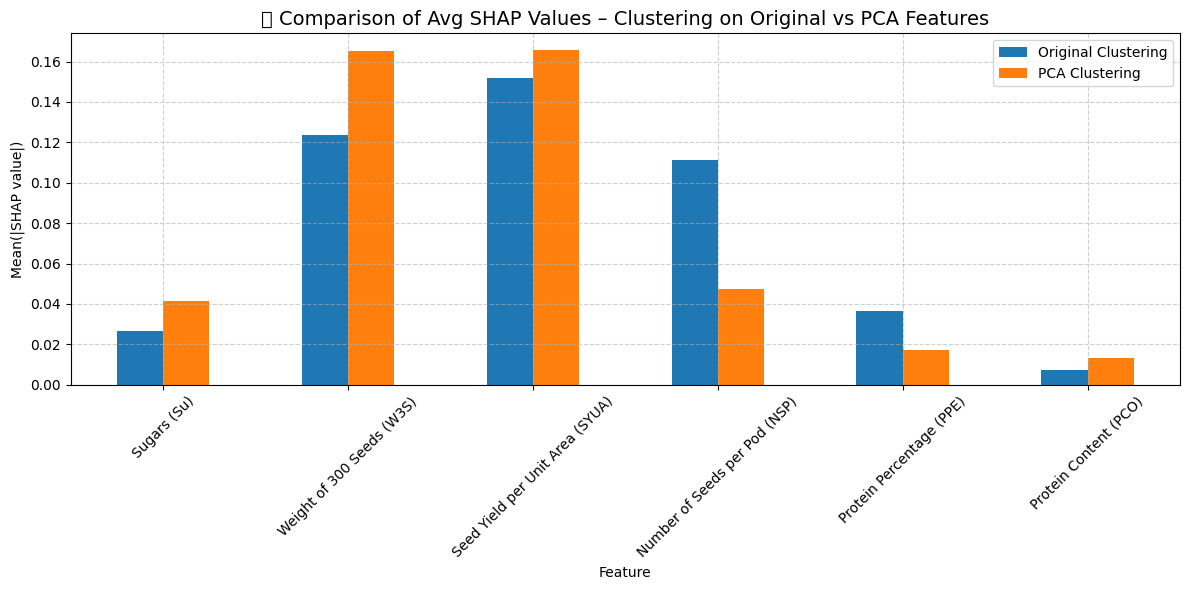

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Prepare Data ---
data = pd.read_csv("3_modified.csv")
data = data.drop_duplicates()

# --- Define Features ---
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)",
            "Protein Percentage (PPE)", "Protein Content (PCO)"]

X_raw = data[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# -----------------------------
# 🚩 METHOD A: Clustering on Original Features
# -----------------------------
kmeans_orig = KMeans(n_clusters=2, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

X_clustered_orig = X_raw.copy()
X_clustered_orig["Cluster"] = labels_orig

# Label clusters (Good/Poor Production)
centroids_orig = scaler.inverse_transform(kmeans_orig.cluster_centers_)
centroids_df_orig = pd.DataFrame(centroids_orig, columns=features)
centroids_df_orig["Total"] = centroids_df_orig.sum(axis=1)
cluster_map_orig = {idx: ("Good Production" if i == 0 else "Poor Production")
                    for i, idx in enumerate(centroids_df_orig["Total"].sort_values(ascending=False).index)}
X_clustered_orig["Cluster Label"] = X_clustered_orig["Cluster"].map(cluster_map_orig)

# -----------------------------
# 🚩 METHOD B: Clustering on PCA-2D Features
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

X_clustered_pca = X_raw.copy()
X_clustered_pca["Cluster"] = labels_pca

# Label clusters (Good/Poor Production)
centroids_pca = kmeans_pca.cluster_centers_
centroids_df_pca = pd.DataFrame(centroids_pca)
centroids_df_pca["Total"] = centroids_df_pca.sum(axis=1)
cluster_map_pca = {idx: ("Good Production" if i == 0 else "Poor Production")
                   for i, idx in enumerate(centroids_df_pca["Total"].sort_values(ascending=False).index)}
X_clustered_pca["Cluster Label"] = X_clustered_pca["Cluster"].map(cluster_map_pca)

# -----------------------------
# 🔍 SHAP Comparison Function
# -----------------------------
def compute_avg_shap(X_input, y_labels, model_output='probability'):
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_labels)

    # Train classifier
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_encoded, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Compute SHAP
    explainer = shap.Explainer(model, X_input, model_output=model_output)
    shap_values = explainer(X_input, check_additivity=False)

    # Use class 0 (Good Production)
    shap_vals = shap_values.values[:, :, 0]
    avg_shap = np.abs(shap_vals).mean(axis=0)

    return avg_shap

# SHAP values from both methods
shap_avg_orig = compute_avg_shap(X_raw, X_clustered_orig["Cluster Label"])
shap_avg_pca = compute_avg_shap(X_raw, X_clustered_pca["Cluster Label"])  # still using original features for SHAP

# -----------------------------
# 📈 Plot SHAP Comparison
# -----------------------------
shap_df = pd.DataFrame({
    "Feature": features,
    "Original Clustering": shap_avg_orig,
    "PCA Clustering": shap_avg_pca
})

shap_df = shap_df.set_index("Feature")

shap_df.plot(kind="bar", figsize=(12, 6))
plt.title("🔍 Comparison of Avg SHAP Values – Clustering on Original vs PCA Features", fontsize=14)
plt.ylabel("Mean(|SHAP value|)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
